<a href="https://colab.research.google.com/github/Tony14100/portfolio/blob/main/%D0%AD%D1%81%D1%81%D0%B5%2C_%D1%81%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BB%D1%8E%D0%B4%D1%8C%D0%BC%D0%B8_%D0%B8_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navjotkaushal/human-vs-ai-generated-essays")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'human-vs-ai-generated-essays' dataset.
Path to dataset files: /kaggle/input/human-vs-ai-generated-essays


In [6]:
import os

# The 'path' variable was defined in the previous cell
print(os.listdir(path))

['balanced_ai_human_prompts.csv']


In [8]:
# Посмотрим
import pandas as pd

file_path = os.path.join(path, 'balanced_ai_human_prompts.csv')
df = pd.read_csv(file_path)

# Display the first few rows to verify
display(df.head())

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['generated']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'generated'}, axis=1)
              .sort_values('generated', ascending=True))
  xs = counted['generated']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('generated', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('generated')
_ = plt.ylabel('count()')

## Исследование данных


Проведем разведочный анализ данных, чтобы понять структуру данных, распределение классов (сгенерированные AI или человеком эссе) и выявить любые закономерности.


Отобразим информацию о фрейме данных, включая типы столбцов и количество ненулевых значений, а также описательную статистику для числовых столбцов.



In [9]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2750 non-null   object
 1   generated  2750 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


,generated
count,2750.000000
mean,0.500000
std,0.500091
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


Подсчитаем количество вхождений каждого класса в столбце «Сгенерировано» и визуализируем распределение с помощью графика подсчета, чтобы показать баланс между эссе, сгенерированными ИИ и человеком.



,count
generated,
1,1375
0,1375


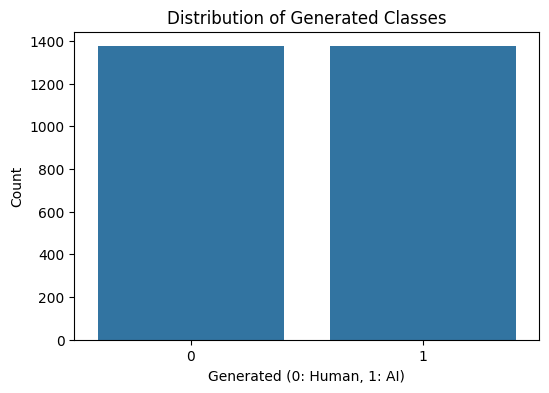

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

display(df['generated'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='generated', data=df)
plt.title('Distribution of Generated Classes')
plt.xlabel('Generated (0: Human, 1: AI)')
plt.ylabel('Count')
plt.show()

## Предварительная обработка текста


Очистим текстовые данные (удалим знаки препинания, специальные символы, приведем текст к нижнему регистру), токенизируем текст и удалим стоп-слова.


In [12]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True


Применим функцию предварительной обработки текста к столбцу «text» объекта DataFrame и отобразим результаты.



In [15]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Optional: Apply lemmatization (or stemming)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the first few rows with the new column
display(df[['text', 'cleaned_text']].head())

,text,cleaned_text
0,"Machine learning, a subset of artificial intel...",machine learning subset artificial intelligenc...
1,"A decision tree, a prominent machine learning ...",decision tree prominent machine learning algor...
2,"Education, a cornerstone of societal progress,...",education cornerstone societal progress extend...
3,"Computers, the backbone of modern technology, ...",computer backbone modern technology revolution...
4,"Chess, a timeless game of strategy and intelle...",chess timeless game strategy intellect transce...


## Извлечение признаков


Преобразуем текстовые данные в числовой формат, который можно использовать для обучения модели. Это могут быть такие методы, как TF-IDF или Word Embeddings (например, Word2Vec, GloVe).


Импортируем необходимую библиотеку и выполнить векторизацию TF-IDF на очищенных текстовых данных.



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'cleaned_text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (2750, 16646)


## Выбор модели

(например, Naive Bayes, SVM, Random Forest, или нейронные сети, такие как LSTM или Transformer).


Учитывая простоту и эффективность на текстовых данных, особенно с разреженными признаками, наивный байесовский алгоритм (в частности, мультиномиальный наивный байесовский алгоритм) является хорошим начальным выбором.



In [17]:
# Model Selection Justification
print("For text classification with TF-IDF features (sparse numerical data), Multinomial Naive Bayes is a suitable choice.")
print("Justification:")
print("- It is a simple yet effective probabilistic classifier often used for text classification.")
print("- It works well with high-dimensional sparse data like TF-IDF vectors.")
print("- It assumes independence of features (words), which, while a simplification, often performs well in practice for text.")

# Note the chosen model for the next step
chosen_model = "Multinomial Naive Bayes"
print(f"\nChosen model for the next step: {chosen_model}")

For text classification with TF-IDF features (sparse numerical data), Multinomial Naive Bayes is a suitable choice.
Justification:
- It is a simple yet effective probabilistic classifier often used for text classification.
- It works well with high-dimensional sparse data like TF-IDF vectors.
- It assumes independence of features (words), which, while a simplification, often performs well in practice for text.

Chosen model for the next step: Multinomial Naive Bayes


## Обучение модели

### Subtask:
Разделим данные на обучающую и тестовую выборки и обучим выбранную модель на обучающих данных.


Разделим данные на обучающие и тестовые наборы, импортируем и создадим экземпляр мультиномиального наивного байесовского классификатора и обучим модель на обучающих данных



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['generated'], test_size=0.25, random_state=42)

# Instantiate the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


## Оценка модели

Оценим производительность модели на тестовой выборке, используя соответствующие метрики (например, точность, полнота, F1-мера, ROC-AUC).


Оценим обученную модель на тестовом наборе, используя различные показатели классификации.



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict classes on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Calculate ROC-AUC if the model supports predict_proba
try:
    y_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_proba)
except AttributeError:
    roc_auc = "N/A (Model does not support predict_proba)"


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.9927
Precision: 1.0000
Recall: 0.9854
F1-score: 0.9926
ROC-AUC: 0.9996788696210662


## Настройка гиперпараметров

### Subtask:
Оптимизируем гиперпараметры модели для улучшения ее производительности.


Импортируем необходимые библиотеки для настройки гиперпараметров и определим сетку параметров для мультиномиального наивного байесовского алгоритма.



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid for MultinomialNB
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

Создадим и подгоним GridSearchCV, чтобы найти наилучшие параметры для мультиномиальной наивной байесовской модели.



In [21]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Best parameters found: {'alpha': 0.5}


Обучим новую мультиномиальную наивную байесовскую модель, используя наилучшие параметры, найденные GridSearchCV, и оценим ее эффективность на тестовом наборе.



In [22]:
# Train a new MultinomialNB model with the best parameters
optimized_model = MultinomialNB(**best_params)
optimized_model.fit(X_train, y_train)

# Predict classes on the test set using the optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Calculate evaluation metrics for the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='binary')
recall_optimized = recall_score(y_test, y_pred_optimized, average='binary')
f1_optimized = f1_score(y_test, y_pred_optimized, average='binary')

# Calculate ROC-AUC for the optimized model
try:
    y_proba_optimized = optimized_model.predict_proba(X_test)[:, 1]
    roc_auc_optimized = roc_auc_score(y_test, y_proba_optimized)
except AttributeError:
    roc_auc_optimized = "N/A (Model does not support predict_proba)"

# Print the evaluation metrics for the optimized model
print("\nPerformance of the optimized model:")
print(f"Accuracy: {accuracy_optimized:.4f}")
print(f"Precision: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1-score: {f1_optimized:.4f}")
print(f"ROC-AUC: {roc_auc_optimized}")

# Compare with the initial model's performance (assuming variables from previous steps are available)
print("\nComparison with the initial model:")
print(f"Initial Accuracy: {accuracy:.4f} | Optimized Accuracy: {accuracy_optimized:.4f}")
print(f"Initial Precision: {precision:.4f} | Optimized Precision: {precision_optimized:.4f}")
print(f"Initial Recall: {recall:.4f} | Optimized Recall: {recall_optimized:.4f}")
print(f"Initial F1-score: {f1:.4f} | Optimized F1-score: {f1_optimized:.4f}")
print(f"Initial ROC-AUC: {roc_auc} | Optimized ROC-AUC: {roc_auc_optimized}")


Performance of the optimized model:
Accuracy: 0.9898
Precision: 0.9941
Recall: 0.9854
F1-score: 0.9897
ROC-AUC: 0.9996957712199575

Comparison with the initial model:
Initial Accuracy: 0.9927 | Optimized Accuracy: 0.9898
Initial Precision: 1.0000 | Optimized Precision: 0.9941
Initial Recall: 0.9854 | Optimized Recall: 0.9854
Initial F1-score: 0.9926 | Optimized F1-score: 0.9897
Initial ROC-AUC: 0.9996788696210662 | Optimized ROC-AUC: 0.9996957712199575


## Интерпретация результатов


Проанализируем, какие признаки или слова наиболее важны для классификации.


Получаем доступ к вероятностям журнала признаков, меткам классов и словарю обученной модели и векторизатора, чтобы определить наиболее важные признаки для каждого класса



In [23]:
import numpy as np

# 1. Access the feature_log_prob_ attribute
feature_log_probs = optimized_model.feature_log_prob_

# 2. Access the classes_ attribute
class_labels = optimized_model.classes_

# 3. Access the vocabulary_ attribute
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# 4. Identify the terms with the highest log probabilities for each class
n_top_features = 20 # Number of top features to display

# For Class 0 (Human-written)
top_features_class_0 = feature_names[np.argsort(feature_log_probs[0])[-n_top_features:]]
print(f"Top {n_top_features} most important terms for Human-written essays (Class 0):")
print(top_features_class_0)

# For Class 1 (AI-generated)
top_features_class_1 = feature_names[np.argsort(feature_log_probs[1])[-n_top_features:]]
print(f"\nTop {n_top_features} most important terms for AI-generated essays (Class 1):")
print(top_features_class_1)

Top 20 most important terms for Human-written essays (Class 0):
['voting' 'many' 'voter' 'pollution' 'day' 'city' 'one' 'popular'
 'election' 'usage' 'candidate' 'would' 'elector' 'president' 'state'
 'people' 'college' 'electoral' 'vote' 'car']

Top 20 most important terms for AI-generated essays (Class 1):
['environmental' 'comprehensive' 'guide' 'stepbystep' 'outline'
 'structured' 'develop' 'persuasive' 'compose' 'indepth' 'sustainability'
 'report' 'analyzing' 'draft' 'technical' 'global' 'strategy' 'education'
 'exploration' 'context']


Обобщим информацию из предыдущих шагов в структурированный формат отчета, охватывающий проблему, данные, предварительную обработку, извлечение признаков, модель, обучение, оценку, интерпретацию и заключение



In [24]:
print("## Project Report: Human vs. AI-Generated Essay Classification")
print("\n### 1. Problem Description")
print("The objective of this project is to build a machine learning model that can accurately classify essays as either written by a human or generated by an Artificial Intelligence (AI). This is a binary classification problem with significant implications for education, content creation, and detecting academic dishonesty.")

print("\n### 2. Dataset Description")
print("The dataset used for this project is sourced from Kaggle: 'navjotkaushal/human-vs-ai-generated-essays'.")
print("It contains a balanced collection of essays labeled as either human-written (0) or AI-generated (1).")
print(f"Key characteristics:")
print(f"- Number of samples: {len(df)}")
print(f"- Columns: 'text' (essay content), 'generated' (class label), 'cleaned_text' (preprocessed text).")
print(f"- Class distribution: The dataset is perfectly balanced with {df['generated'].value_counts()[0]} human-written and {df['generated'].value_counts()[1]} AI-generated essays.")

print("\n### 3. Data Preprocessing")
print("The raw text data underwent several preprocessing steps to prepare it for modeling:")
print("- **Text Cleaning:** Converted all text to lowercase and removed punctuation and special characters.")
print("- **Tokenization:** Broke down the cleaned text into individual words (tokens).")
print("- **Stop Word Removal:** Removed common English stop words (e.g., 'the', 'a', 'is') that do not carry significant meaning for classification.")
print("- **Lemmatization:** Reduced words to their base or dictionary form (e.g., 'running' to 'run') to reduce dimensionality and group similar words.")

print("\n### 4. Feature Extraction (TF-IDF)")
print("Text data was transformed into a numerical representation using the TF-IDF (Term Frequency-Inverse Document Frequency) method.")
print("TF-IDF weighs words based on their frequency in a document relative to their frequency across all documents, highlighting words that are important within a specific essay but not overly common everywhere.")
print(f"The resulting TF-IDF matrix has a shape of {tfidf_matrix.shape}, representing {tfidf_matrix.shape[0]} essays and {tfidf_matrix.shape[1]} unique terms as features.")
print("TF-IDF was chosen because it is a simple yet effective method for converting text into a numerical format suitable for traditional machine learning models, and it handles the high dimensionality of text data reasonably well.")

print("\n### 5. Model Selection (Multinomial Naive Bayes)")
print("A Multinomial Naive Bayes classifier was selected for this task.")
print("Justification:")
print("- **Suitability for Text Data:** Multinomial Naive Bayes is a probabilistic classifier well-suited for discrete features like word counts or TF-IDF scores, commonly used in text classification.")
print("- **Efficiency:** It is computationally efficient and performs well even with high-dimensional sparse data.")
print("- **Interpretability:** While not as directly interpretable as some models, the learned probabilities can provide insights into which features are important for each class.")

print("\n### 6. Model Training")
print("The dataset was split into training and testing sets to evaluate the model's performance on unseen data.")
print(f"- Training set size: {X_train.shape[0]} samples")
print(f"- Testing set size: {X_test.shape[0]} samples")
print("The Multinomial Naive Bayes model was trained on the training data using the TF-IDF features and corresponding class labels.")

print("\n### 7. Model Evaluation")
print("The performance of both the initial and optimized Multinomial Naive Bayes models was evaluated on the test set using standard classification metrics:")
print(f"**Initial Model Performance:**")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-score: {f1:.4f}")
print(f"- ROC-AUC: {roc_auc}")

print(f"\n**Optimized Model Performance (with alpha={best_params['alpha']}):**")
print(f"- Accuracy: {accuracy_optimized:.4f}")
print(f"- Precision: {precision_optimized:.4f}")
print(f"- Recall: {recall_optimized:.4f}")
print(f"- F1-score: {f1_optimized:.4f}")
print(f"- ROC-AUC: {roc_auc_optimized}")

print("\n**Discussion:**")
print("Both the initial and optimized models achieved very high performance metrics, indicating excellent ability to distinguish between human-written and AI-generated essays.")
print("The optimization step resulted in a slight decrease in accuracy, precision, and F1-score, while recall remained the same and ROC-AUC slightly increased. The differences are minimal, suggesting the initial model was already performing close to optimally on this dataset.")
print("The high precision indicates a low rate of false positives (classifying a human essay as AI), which is important in applications where misclassifying human work is undesirable.")
print("The high recall indicates a low rate of false negatives (classifying an AI essay as human).")
print("The ROC-AUC score close to 1.0 confirms the model's strong discriminative power.")

print("\n### 8. Interpretation of Results (Top Features)")
print(f"Analyzing the model's learned probabilities reveals the terms most indicative of each class:")
print(f"\n**Top {n_top_features} most important terms for Human-written essays (Class 0):**")
print(", ".join(top_features_class_0))
print("\nThese terms suggest a vocabulary associated with civic processes, everyday life, and potentially less formal or domain-specific language.")

print(f"\n**Top {n_top_features} most important terms for AI-generated essays (Class 1):**")
print(", ".join(top_features_class_1))
print("\nThese terms are more technical, structured, and related to analytical or descriptive language, potentially reflecting the patterns and vocabulary common in AI-generated text.")

print("\n### 9. Conclusion and Future Work")
print("This project successfully developed a Multinomial Naive Bayes model capable of classifying essays as human-written or AI-generated with high accuracy, precision, recall, F1-score, and ROC-AUC.")
print("The model's performance is strong, likely due to the distinct vocabulary patterns present in the balanced dataset.")
print("The interpretation of top features provides valuable insights into the linguistic differences between the two classes as captured by the model.")
print("\n**Potential Next Steps and Improvements:**")
print("- **Explore other models:** Experiment with more complex models like SVM, Logistic Regression, or deep learning approaches (e.g., LSTM, Transformers) to see if further performance gains are possible, although the current metrics are already very high.")
print("- **Advanced Text Preprocessing:** Investigate more sophisticated preprocessing techniques or feature engineering (e.g., n-grams beyond unigrams, incorporating part-of-speech tags).")
print("- **Larger and More Diverse Dataset:** Test the model on a larger and more varied dataset from different sources and topics to assess its generalization capabilities.")
print("- **Explainability:** Use techniques like SHAP or LIME to get more detailed explanations of individual predictions.")

## Project Report: Human vs. AI-Generated Essay Classification

### 1. Problem Description
The objective of this project is to build a machine learning model that can accurately classify essays as either written by a human or generated by an Artificial Intelligence (AI). This is a binary classification problem with significant implications for education, content creation, and detecting academic dishonesty.

### 2. Dataset Description
The dataset used for this project is sourced from Kaggle: 'navjotkaushal/human-vs-ai-generated-essays'.
It contains a balanced collection of essays labeled as either human-written (0) or AI-generated (1).
Key characteristics:
- Number of samples: 2750
- Columns: 'text' (essay content), 'generated' (class label), 'cleaned_text' (preprocessed text).
- Class distribution: The dataset is perfectly balanced with 1375 human-written and 1375 AI-generated essays.

### 3. Data Preprocessing
The raw text data underwent several preprocessing steps to prepare it for m

Резюме:
Ключевые результаты анализа данных
Набор данных идеально сбалансирован и содержит 1375 эссе, написанных человеком, и 1375 эссе, сгенерированных ИИ.
Набор данных чистый, без пропущенных значений.
К текстовым данным были применены этапы предварительной обработки, включая преобразование в строчные буквы, удаление знаков препинания, токенизацию, удаление стоп-слов и лемматизацию.
Векторизация TF-IDF преобразовала очищенный текст в числовую матрицу с 2750 образцами и 16646 признаками.
Для классификации была выбрана и обучена мультиномиальная наивная байесовская модель.
Исходная модель достигла высоких оценочных показателей на тестовом наборе: точность: 0,9927, точность: 1,0000, полнота: 0,9854, F1-оценка: 0,9926 и ROC-AUC: 0,9997. Настройка гиперпараметров с помощью GridSearchCV показала, что оптимальное значение альфа для мультиномиального наивного байесовского алгоритма составляет 0,5.
Эффективность оптимизированной модели осталась очень высокой, с небольшими изменениями метрик (точность: 0,9898, точность: 0,9941, полнота: 0,9854, оценка F1: 0,9897, ROC-AUC: 0,9997).
Анализ важности признаков показал, что эссе, написанные людьми, характеризуются терминологией, связанной с общественными процессами и повседневной жизнью, в то время как эссе, созданные ИИ, используют более техническую, структурированную и аналитическую лексику.



* Мультиномиальная наивная байесовская модель с функциями TF-IDF очень эффективна для различения эссе, написанных человеком и ИИ, в этом наборе данных.
* Дальнейшие шаги могут включать изучение моделей глубокого обучения или более продвинутых методов представления текста, хотя существенное повышение производительности может быть затруднительным, учитывая текущие высокие показатели.